<a href="https://colab.research.google.com/github/VoTanThinh/googlecolab/blob/main/fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import skfuzzy as fuzz
x = np.arange(11) #tạo ra khoảng dữ liệu từ 0-10
mfx = fuzz.trimf(x,[0,0,5]) #tam giác nhỏ không [giá trị đầu, điểm giữa, giá trị cuối] nếu k có điểm giữa cho nó bằng 0
print(mfx)
print(x)

[1.  0.8 0.6 0.4 0.2 0.  0.  0.  0.  0.  0. ]
[ 0  1  2  3  4  5  6  7  8  9 10]


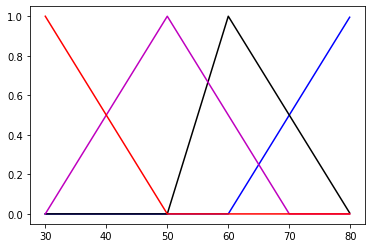

In [ ]:
# sử dụng hàm hình tam giác trimf(x,[a,b,c])
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium Powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

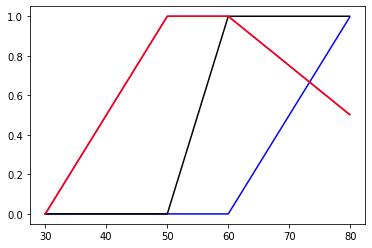

In [ ]:
#sử dụng hàm hình thang trapmf(x,[a,b,c,d])
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,50,60,100])
medium = fuzz.trapmf(x,[30,50,60,100])
medium_fast = fuzz.trapmf(x,[50,60,90,100])
full_speed = fuzz.trapmf(x,[60,80,90,100])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium Powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')


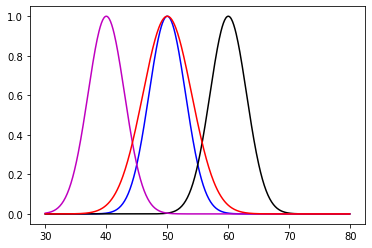

In [ ]:

# sử dụng hình gauss phương sai
import numpy as np
import skfuzzy as fuzz               
import matplotlib.pyplot as plt
x = np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,50,4)   #(x,vị trí đỉnh,phương sai 3 hoặc 4)
medium = fuzz.gaussmf(x,40,3)
medium_fast = fuzz.gaussmf(x,60,3)
full_speed = fuzz.gaussmf(x,50,3)
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium Powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

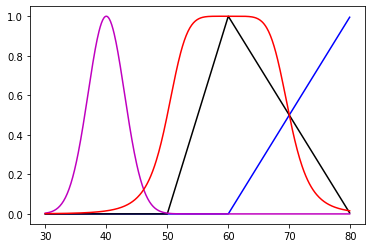

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x = np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,10,3,60) #(x,độ rộng,độ dốc,vị trí đỉnh)
medium = fuzz.gaussmf(x,40,3)
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trapmf(x,[60,80,90,100])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium Powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

25.515706032513773


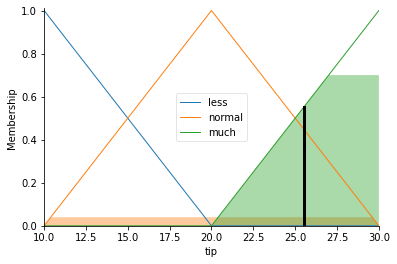

In [ ]:
#bài toán nhà hàng input food,service:output là tip
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
Food = ctrl.Antecedent(np.arange(0,11,1),'food') #tạo ra tín hiệu input (tạo từ 0-10, với độ phân giải là 1)
Service = ctrl.Antecedent(np.arange(0,11,1),'service') #tạo ra tín hiệu input (tạo từ 0-10, với độ phân giải là 1)
Tip = ctrl.Consequent(np.arange(0,100,1),'tip') #tạo output (0-30, độ phân giải là 1)
Food['poor'] = fuzz.trimf(Food.universe,[0,0,5])
Food['average'] = fuzz.trimf(Food.universe,[0,5,10])
Food['good'] = fuzz.trimf(Food.universe,[5,10,10])

Service['poor'] = fuzz.trimf(Service.universe,[0,0,5])
Service['average'] = fuzz.trimf(Service.universe,[0,5,10])
Service['good'] = fuzz.trimf(Service.universe,[5,10,10])  # [điểm dầu, điểm cuối, vị trí đỉnh]
       
Tip['less'] = fuzz.trimf(Tip.universe,[10,10,20])
Tip['normal'] = fuzz.trimf(Tip.universe,[10,20,30])
Tip['much'] = fuzz.trimf(Tip.universe,[20,30,30])
#Food.view()
#Service.view()
#Tip.view()
rule1 = ctrl.Rule(Food['poor']&Service['poor'],Tip['less'])
rule2 = ctrl.Rule(Food['average']&Service['poor'],Tip['normal'])
rule3 = ctrl.Rule(Food['good']&Service['poor'],Tip['normal'])

rule4 = ctrl.Rule(Food['poor']&Service['average'],Tip['normal'])
rule5 = ctrl.Rule(Food['average']&Service['average'],Tip['normal'])
rule6= ctrl.Rule(Food['good']&Service['average'],Tip['much'])

rule7= ctrl.Rule(Food['poor']&Service['good'],Tip['normal'])
rule8= ctrl.Rule(Food['average']&Service['good'],Tip['much'])
rule9= ctrl.Rule(Food['good']&Service['good'],Tip['much'])

tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 9.8
tipping.compute()
print(tipping.output['tip'])
Tip.view(sim=tipping)


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl 
Time = ctrl.Antecedent(np.arange(10,180,1),'time') #tạo ra tín hiệu input (tạo từ 0-10, với độ phân giải là 1)
Rise = ctrl.Antecedent(np.arange(200,1000,1),'rise') #tạo ra tín hiệu input (tạo từ 0-10, với độ phân giải là 1)
Power = ctrl.Consequent(np.arange(10,31,1),'power') #tạo output (0-30, độ phân giải là 1)
Food['poor'] = fuzz.trimf(Food.universe,[0,0,5])
Food['average'] = fuzz.trimf(Food.universe,[0,5,10])
Food['good'] = fuzz.trimf(Food.universe,[5,10,10])

Service['poor'] = fuzz.trimf(Service.universe,[0,0,5])
Service['average'] = fuzz.trimf(Service.universe,[0,5,10])
Service['good'] = fuzz.trimf(Service.universe,[5,10,10])  # [điểm dầu, điểm cuối, vị trí đỉnh]
       
Tip['less'] = fuzz.trimf(Tip.universe,[10,10,20])
Tip['normal'] = fuzz.trimf(Tip.universe,[10,20,30])
Tip['much'] = fuzz.trimf(Tip.universe,[20,30,30])